In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing
from sklearn.cluster import KMeans

# task 1 Bike

In [2]:
bike = pd.read_csv("bike_data.csv")
bike

,season,month,holiday,weekday,workingday,weather,temp,hum,wind,registered,cnt,day
0,1,1,0,7,0,2,14.110847,80.5833,10.749882,31771,985,1
1,1,1,0,1,0,2,14.902598,69.6087,16.652113,32548,801,1
2,1,1,0,2,1,1,8.050924,43.7273,16.636703,59704,1349,1
3,1,1,0,3,1,1,8.200000,59.0435,10.739832,70635,1562,1
4,1,1,0,4,1,1,9.305237,43.6957,12.522300,73744,1600,1
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,5,1,2,10.420847,65.2917,23.458911,90698,2114,27
726,1,12,0,6,1,2,10.386653,59.0000,10.416557,119069,3095,28
727,1,12,0,7,0,2,10.386653,75.2917,8.333661,57421,1341,29
728,1,12,0,1,0,1,10.489153,48.3333,23.500518,69566,1796,30


In [3]:
bike.info()
# no missing values
# all columns are int or float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   month       730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   weekday     730 non-null    int64  
 4   workingday  730 non-null    int64  
 5   weather     730 non-null    int64  
 6   temp        730 non-null    float64
 7   hum         730 non-null    float64
 8   wind        730 non-null    float64
 9   registered  730 non-null    int64  
 10  cnt         730 non-null    int64  
 11  day         730 non-null    int64  
dtypes: float64(3), int64(9)
memory usage: 68.6 KB


### 1.1 Exploratory data analysis

#### 1.1.1 create visualizations that show the relationship between ’cnt’ and the other variables

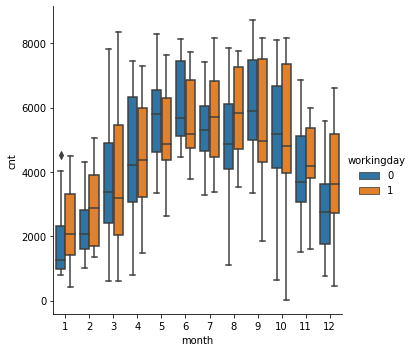

In [4]:
# cnt and month
sns.catplot(x="month",y="cnt",data=bike,kind="box",hue="workingday")

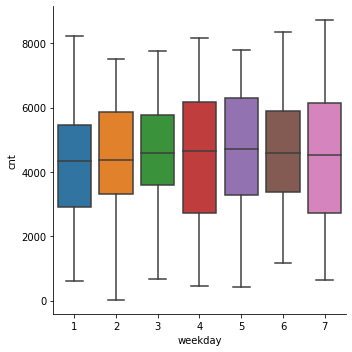

In [5]:
# cnt and workingday
sns.catplot(x="weekday",y="cnt",data=bike,kind="box")

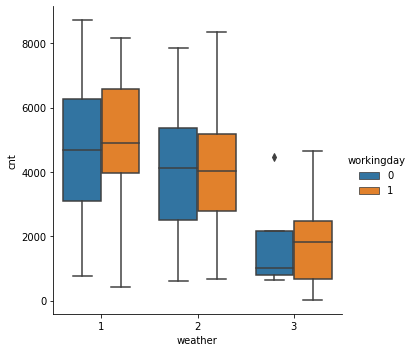

In [6]:
# cnt and weather
sns.catplot(x="weather",y="cnt",data=bike,kind="box",hue="workingday")

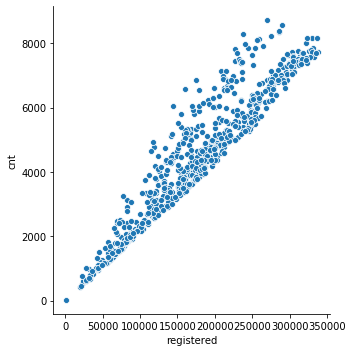

In [7]:
# cnt and registered
sns.relplot(x="registered",y="cnt",data=bike)

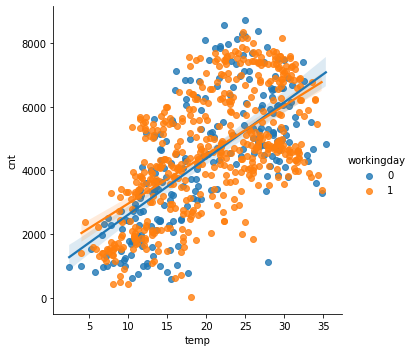

In [8]:
# cnt and temp
sns.lmplot(x="temp",y="cnt",data=bike,hue="workingday")

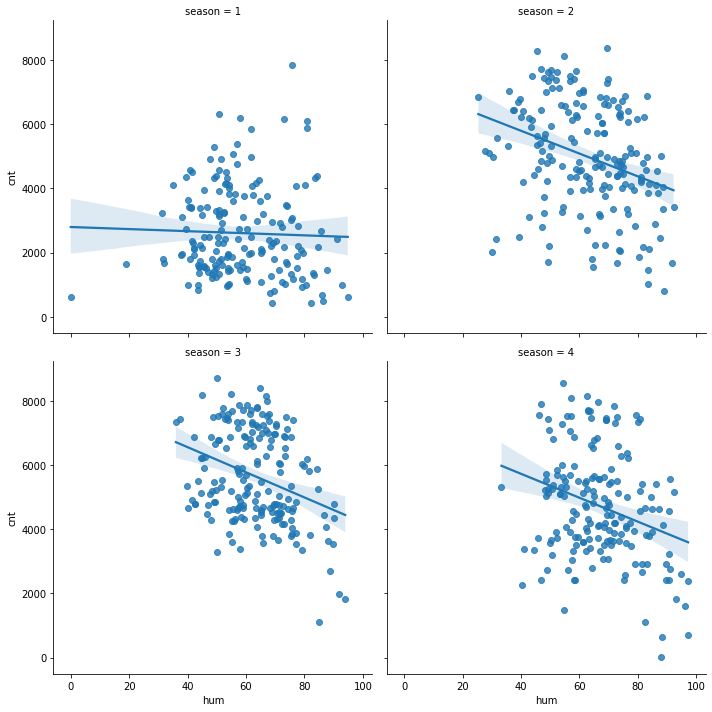

In [9]:
# cnt and hum and season
sns.lmplot(x="hum",y="cnt",data=bike,col="season",col_wrap=2)

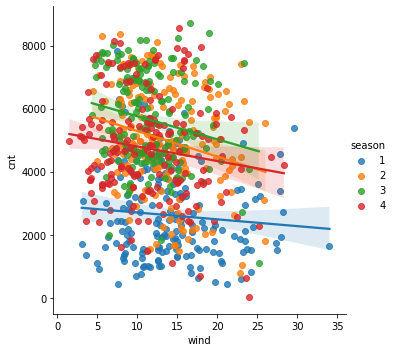

In [10]:
# cnt and wind
sns.lmplot(x="wind",y="cnt",data=bike,hue="season")

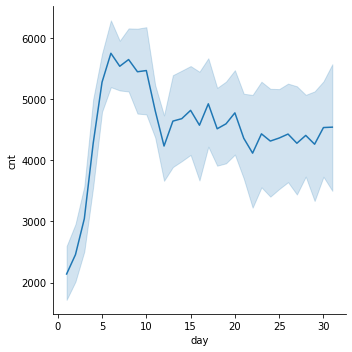

In [11]:
# cnt and day
sns.relplot(x="day",y="cnt",data=bike,kind="line")

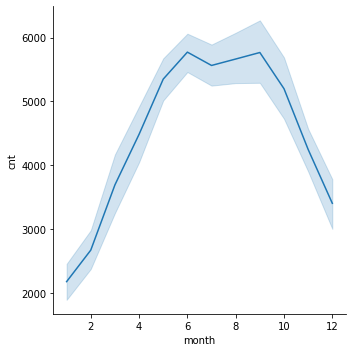

In [12]:
sns.relplot(x="month",y="cnt",data=bike,kind="line")

#### 1.1.2  perform aggregation (check how average ’cnt’ varies across months, days, working days, and holidays)

In [13]:
# average cnt and month
bike["cnt"].groupby(bike.month).mean().sort_values()

month
1     2176.338710
2     2669.964286
12    3403.806452
3     3692.258065
11    4247.183333
4     4484.900000
10    5199.225806
5     5349.774194
7     5563.677419
8     5664.419355
9     5766.516667
6     5772.366667
Name: cnt, dtype: float64

In [14]:
# average cnt and days
bike.cnt.groupby(bike.day).mean().sort_values()

day
1     2139.708333
2     2456.875000
3     3045.000000
22    4119.291667
12    4235.541667
29    4265.227273
4     4278.833333
27    4281.083333
24    4316.916667
21    4363.125000
25    4366.708333
28    4409.666667
26    4431.666667
23    4435.166667
18    4518.208333
30    4538.409091
31    4544.642857
16    4576.541667
19    4599.458333
13    4643.666667
14    4683.583333
20    4779.041667
11    4816.166667
15    4819.875000
17    4927.291667
5     5281.333333
9     5451.875000
10    5471.916667
7     5542.083333
8     5652.083333
6     5754.791667
Name: cnt, dtype: float64

In [15]:
# average cnt and working days
bike.cnt.groupby(bike.workingday).mean()

workingday
0    4330.168831
1    4590.332665
Name: cnt, dtype: float64

In [16]:
# t-test
from scipy import stats


non_work = bike[bike.workingday==0].cnt
work = bike[bike.workingday==1].cnt
stats.ttest_ind(non_work,work)

# p>0.05 
# we can not reject that they are the same. 
# maybe the same, and maybe the average cnt working day is significantly larger than non workingday. it is not sure.

Ttest_indResult(statistic=-1.6907786191590892, pvalue=0.09130713322894805)

In [17]:
# average cnt and holidays
bike.cnt.groupby(bike.holiday).mean()

holiday
0    4530.90268
1    3735.00000
Name: cnt, dtype: float64

In [18]:
# t-test
non_ho = bike[bike.holiday==0].cnt
ho = bike[bike.holiday==1].cnt

stats.ttest_ind(non_ho,ho)

# p >0.05 
# can not reject they are the same
# it is not sure


Ttest_indResult(statistic=1.8597495722808104, pvalue=0.06332412651800291)

In [19]:
bike.pivot_table(["cnt"],index=["month","day","workingday","holiday"]).sort_values(by="cnt")

,,,,cnt
month,day,workingday,holiday,
10,29,1,0,22.0
12,26,1,0,441.0
10,29,0,0,627.0
12,25,0,0,754.0
4,16,0,0,795.0
...,...,...,...,...
10,20,0,0,8090.0
5,19,0,0,8294.0
9,22,0,0,8395.0


In [20]:
bike.pivot_table(["cnt"],index=["workingday","holiday"]).sort_values(by="cnt")

cnt
workingday holiday             
0          1        3735.000000
           0        4389.685714
1          0        4590.332665

#### 1.1.3  calculate correlation of the variables.

In [21]:
bike.corr()["cnt"]

season        0.404584
month         0.278191
holiday      -0.068764
weekday       0.067534
workingday    0.062542
weather      -0.295929
temp          0.627044
hum          -0.098543
wind         -0.235132
registered    0.945411
cnt           1.000000
day           0.041484
Name: cnt, dtype: float64

### 1.2 Develop a regression model that the company can use to predict the count of total rental bikes. Start with all the variables included in the data file, then follow the process suggested in the lectures to remove variables as long as you still find the model performance acceptable.

In [22]:
# move "cnt" column to the most right position
bike=bike[["season","month","holiday","weekday","workingday","weather","temp","hum","wind","registered","day","cnt"]]
bike

,season,month,holiday,weekday,workingday,weather,temp,hum,wind,registered,day,cnt
0,1,1,0,7,0,2,14.110847,80.5833,10.749882,31771,1,985
1,1,1,0,1,0,2,14.902598,69.6087,16.652113,32548,1,801
2,1,1,0,2,1,1,8.050924,43.7273,16.636703,59704,1,1349
3,1,1,0,3,1,1,8.200000,59.0435,10.739832,70635,1,1562
4,1,1,0,4,1,1,9.305237,43.6957,12.522300,73744,1,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,12,0,5,1,2,10.420847,65.2917,23.458911,90698,27,2114
726,1,12,0,6,1,2,10.386653,59.0000,10.416557,119069,28,3095
727,1,12,0,7,0,2,10.386653,75.2917,8.333661,57421,29,1341
728,1,12,0,1,0,1,10.489153,48.3333,23.500518,69566,30,1796


In [23]:
# Develop a regression model with all variables
bike_x,bike_y= bike[bike.columns[:11]],bike.cnt
x2 = sm.add_constant(bike_x)
est_b= sm.OLS(bike_y,x2)
est2_b=est_b.fit()

print (est2_b.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1764.
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:38:31   Log-Likelihood:                -5343.6
No. Observations:                 730   AIC:                         1.071e+04
Df Residuals:                     718   BIC:                         1.077e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        571.1972    101.554      5.625      0.0

In [24]:
# remove highest p-value for each coefficient
# first "day" p-value= 0.769

x2 = sm.add_constant(bike_x.drop(["day"],axis=1))
est_b= sm.OLS(bike_y,x2)
est2_b=est_b.fit()

print (est2_b.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1943.
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:38:31   Log-Likelihood:                -5343.7
No. Observations:                 730   AIC:                         1.071e+04
Df Residuals:                     719   BIC:                         1.076e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        566.9052    100.434      5.645      0.0

In [25]:
# remove highest p-value for each coefficient
# remove "season",p-value=0.598

x2 = sm.add_constant(bike_x.drop(["day","season"],axis=1))
est_b= sm.OLS(bike_y,x2)
est2_b=est_b.fit()

print (est2_b.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     2161.
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:38:31   Log-Likelihood:                -5343.8
No. Observations:                 730   AIC:                         1.071e+04
Df Residuals:                     720   BIC:                         1.075e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        563.9273    100.224      5.627      0.0

In [26]:
# remove highest p-value for each coefficient
# remove "weather",p-value=0.334

x2 = sm.add_constant(bike_x.drop(["day","season","weather"],axis=1))
est_b= sm.OLS(bike_y,x2)
est2_b=est_b.fit()

print (est2_b.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     2431.
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:38:31   Log-Likelihood:                -5344.3
No. Observations:                 730   AIC:                         1.071e+04
Df Residuals:                     721   BIC:                         1.075e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        567.6287    100.146      5.668      0.0

In [27]:
# removed "day","season",and "weather", the R-squared value stays the same 0.964, 
# and all other variables'p-value is below 0.05

# try to find multicollinearity 
bike_x.drop(["day","season","weather"],axis=1).corr()


,month,holiday,weekday,workingday,temp,hum,wind,registered
month,1.000000,0.018905,0.009523,-0.004688,0.219083,0.224937,-0.208013,0.291952
holiday,0.018905,1.000000,-0.101962,-0.252948,-0.028764,-0.015662,0.006257,-0.109142
weekday,0.009523,-0.101962,1.000000,0.035800,-0.000168,-0.052290,0.014283,0.057427
workingday,-0.004688,-0.252948,0.035800,1.000000,0.053470,0.023202,-0.018666,0.305437
temp,0.219083,-0.028764,-0.000168,0.053470,1.000000,0.128565,-0.158186,0.539436
hum,0.224937,-0.015662,-0.052290,0.023202,0.128565,1.000000,-0.248506,-0.089212
wind,-0.208013,0.006257,0.014283,-0.018666,-0.158186,-0.248506,1.000000,-0.217915
registered,0.291952,-0.109142,0.057427,0.305437,0.539436,-0.089212,-0.217915,1.000000


In [28]:
# no correlations are higher than 0.7, or lower than -0.7
# so this is the final model

x2 = sm.add_constant(bike_x.drop(["day","season","weather"],axis=1))
est_b= sm.OLS(bike_y,x2)
est2_b=est_b.fit()

print (est2_b.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     2431.
Date:                Fri, 19 Aug 2022   Prob (F-statistic):               0.00
Time:                        11:38:32   Log-Likelihood:                -5344.3
No. Observations:                 730   AIC:                         1.071e+04
Df Residuals:                     721   BIC:                         1.075e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        567.6287    100.146      5.668      0.0

### 1.3 By looking at the coefficients of your final model, would you say that, in general, the company will need more bikes: (i) on working days or non-working days; (ii) on a day when temperature is 20 or on a day when temperature is 25?

#### 1.3.1 on working days or non-working days;

In [29]:
# because the coefficient of workingdays is negtive, 
# so the company will need more bikes on the non-working days (workingday == 1)



#### 1.3.2 on a day when temperature is 20 or on a day when temperature is 25?

In [30]:
# because the coefficient of temp is positive, 
# so the company will need more bikes on a day when temperature is 25. 


# task 2  Bank



In [31]:
bank = pd.read_csv("bank.csv")
bank

,age,job,marital,education,balance,housing,loan,day,month,duration,contact_count,previous,outcome
0,58,management,married,tertiary,2143,1,0,5,5,261,1,0,0
1,44,technician,single,secondary,29,1,0,5,5,151,1,0,0
2,33,entrepreneur,married,secondary,2,1,1,5,5,76,1,0,0
3,35,management,married,tertiary,231,1,0,5,5,139,1,0,0
4,28,management,single,tertiary,447,1,1,5,5,217,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,51,technician,married,tertiary,825,0,0,17,11,977,3,0,1
43189,71,retired,divorced,primary,1729,0,0,17,11,456,2,0,1
43190,72,retired,married,secondary,5715,0,0,17,11,1127,5,3,1
43191,57,blue-collar,married,secondary,668,0,0,17,11,508,4,0,0


In [32]:
bank.info()
# no missing values
# job, marital, education are object, may need get dummies.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43193 entries, 0 to 43192
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            43193 non-null  int64 
 1   job            43193 non-null  object
 2   marital        43193 non-null  object
 3   education      43193 non-null  object
 4   balance        43193 non-null  int64 
 5   housing        43193 non-null  int64 
 6   loan           43193 non-null  int64 
 7   day            43193 non-null  int64 
 8   month          43193 non-null  int64 
 9   duration       43193 non-null  int64 
 10  contact_count  43193 non-null  int64 
 11  previous       43193 non-null  int64 
 12  outcome        43193 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 4.3+ MB


### 2.1 Perform one-hot encoding on the categorical columns job, marital and education

In [33]:
bank_d = pd.get_dummies(bank,columns=["job","marital","education"],drop_first=True)
bank_d

,age,balance,housing,loan,day,month,duration,contact_count,previous,outcome,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary
0,58,2143,1,0,5,5,261,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,44,29,1,0,5,5,151,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2,33,2,1,1,5,5,76,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,35,231,1,0,5,5,139,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,447,1,1,5,5,217,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,51,825,0,0,17,11,977,3,0,1,...,0,0,0,0,1,0,1,0,0,1
43189,71,1729,0,0,17,11,456,2,0,1,...,1,0,0,0,0,0,0,0,0,0
43190,72,5715,0,0,17,11,1127,5,3,1,...,1,0,0,0,0,0,1,0,1,0
43191,57,668,0,0,17,11,508,4,0,0,...,0,0,0,0,0,0,1,0,1,0


### 2.2 Check the histograms of the columns balance, duration and contact count. If you think there are outliers in the data, remove them.

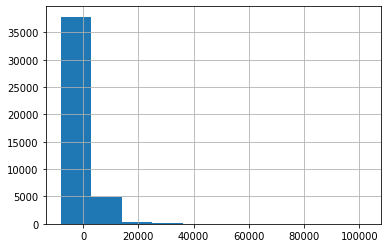

In [34]:
bank_d.balance.hist()

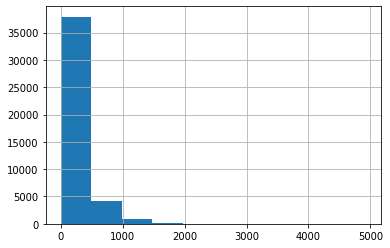

In [35]:
bank_d.duration.hist()

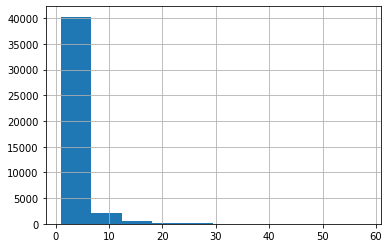

In [36]:
bank_d.contact_count.hist()

In [37]:
# there are outliers, try to remove top 1% of the 3 columns. 
cutoff_balance = bank_d["balance"].quantile(0.99)
cutoff_duration = bank_d["duration"].quantile(0.99)
cutoff_cc = bank_d["contact_count"].quantile(0.99)

bank_d= bank_d[(bank_d.balance<cutoff_balance)&(bank_d.duration<cutoff_duration)&(bank_d["contact_count"]<cutoff_cc)]

bank_d

,age,balance,housing,loan,day,month,duration,contact_count,previous,outcome,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary
0,58,2143,1,0,5,5,261,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,44,29,1,0,5,5,151,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2,33,2,1,1,5,5,76,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,35,231,1,0,5,5,139,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,447,1,1,5,5,217,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,51,825,0,0,17,11,977,3,0,1,...,0,0,0,0,1,0,1,0,0,1
43189,71,1729,0,0,17,11,456,2,0,1,...,1,0,0,0,0,0,0,0,0,0
43190,72,5715,0,0,17,11,1127,5,3,1,...,1,0,0,0,0,0,1,0,1,0
43191,57,668,0,0,17,11,508,4,0,0,...,0,0,0,0,0,0,1,0,1,0


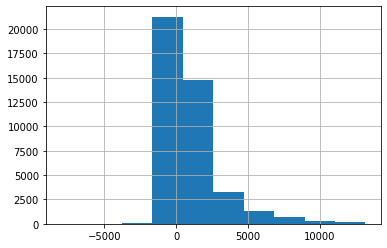

In [38]:
bank_d.balance.hist()

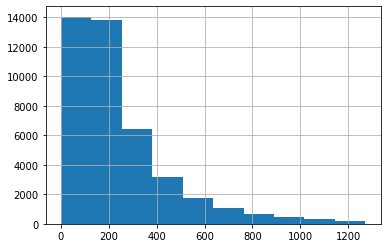

In [39]:
bank_d.duration.hist()

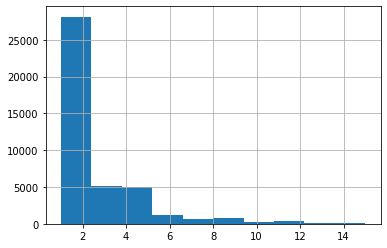

In [40]:
bank_d.contact_count.hist()

### 2.3 Build a logistic regression classification model with ’outcome’ column as the target, and using all other variables as predictors. Divide the data set into training (75 %) and test set (25 %), use random state = 0, and follow the process of building a classification model as discussed in the course. (Hint: if you encounter a warning, you can set the parameter max iter = 1000 within LogisticRegression()).

In [41]:
bank_d

,age,balance,housing,loan,day,month,duration,contact_count,previous,outcome,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary
0,58,2143,1,0,5,5,261,1,0,0,...,0,0,0,0,0,0,1,0,0,1
1,44,29,1,0,5,5,151,1,0,0,...,0,0,0,0,1,0,0,1,1,0
2,33,2,1,1,5,5,76,1,0,0,...,0,0,0,0,0,0,1,0,1,0
3,35,231,1,0,5,5,139,1,0,0,...,0,0,0,0,0,0,1,0,0,1
4,28,447,1,1,5,5,217,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,51,825,0,0,17,11,977,3,0,1,...,0,0,0,0,1,0,1,0,0,1
43189,71,1729,0,0,17,11,456,2,0,1,...,1,0,0,0,0,0,0,0,0,0
43190,72,5715,0,0,17,11,1127,5,3,1,...,1,0,0,0,0,0,1,0,1,0
43191,57,668,0,0,17,11,508,4,0,0,...,0,0,0,0,0,0,1,0,1,0


In [42]:
x_train,x_test,y_train,y_test = train_test_split(bank_d.drop(["outcome"],axis=1),bank_d.outcome,test_size=0.25,random_state=0)

In [43]:
model = LogisticRegression(solver = 'lbfgs', max_iter = 1000 )

In [44]:
model.fit(x_train,y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 2.4 Create the confusion matrix, calculate classification performance measures. What is the accuracy of the model on the test set?

In [45]:
y_predict= model.predict(x_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
matrix = confusion_matrix(y_test, y_predict)

print (matrix)

[[9056  188]
 [ 967  251]]


In [47]:
# the accuracy is (9056+251)/(188+251+9056+967)
(9056+251)/(188+251+9056+967)

0.8896004588032881

In [48]:
# double check the accuracy

report = classification_report(y_test, y_predict)

print(report)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9244
           1       0.57      0.21      0.30      1218

    accuracy                           0.89     10462
   macro avg       0.74      0.59      0.62     10462
weighted avg       0.86      0.89      0.87     10462



### 2.5 Does the model perform similarly for the two possible categories of ’outcome’, i.e. for positive and negative class? If not, do you think it is a problem? How many false negatives do you find, i.e. clients who would invest in the advertised product but the model predicts that they would not?

In [49]:
# the model perform not similarly for the two possible categories of "outcome". 
# for the actual positive cases, the model has a low chance to predict correctly.
# for the actual negative cases, the mosel has a high chance to predict correctly.

# yes, it is a problem.
# there are much more people who will invest, but the model predicts that they will not invest. 
# This can lead to insufficient preparation of the bank，Seriously affect the bank's earnings.

# False negative: there are 967 people who would invest in the advertised product but the model predicts that they would not.

# task 3 patients

In [50]:
patients = pd.read_csv("patients.csv")
patients

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise,outcome
0,63,1,3,145,233,1,150,0,1
1,37,1,2,130,250,0,187,0,1
2,41,0,1,130,204,0,172,0,1
3,56,1,1,120,236,0,178,0,1
4,57,0,0,120,354,0,163,1,1
...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,123,1,0
299,45,1,3,110,264,0,132,0,0
300,68,1,0,144,193,1,141,0,0
301,57,1,0,130,131,0,115,1,0


In [51]:
patients.info()
# no missing values
# all int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             303 non-null    int64
 1   gender          303 non-null    int64
 2   pain            303 non-null    int64
 3   blood_pressure  303 non-null    int64
 4   cholesterol     303 non-null    int64
 5   blood_sugar     303 non-null    int64
 6   heart_rate      303 non-null    int64
 7   exercise        303 non-null    int64
 8   outcome         303 non-null    int64
dtypes: int64(9)
memory usage: 21.4 KB


### 3.1 Scale all the variables.

In [52]:
patients_s = patients.drop(["outcome"],axis=1).apply(lambda x: preprocessing.scale(x))
patients_s

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,0.015443,-0.696631
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,1.633471,-0.696631
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,0.977514,-0.696631
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,1.239897,-0.696631
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.583939,1.435481
...,...,...,...,...,...,...,...,...
298,0.290464,-1.468418,-0.938515,0.478391,-0.101730,-0.417635,-1.165281,1.435481
299,-1.033002,0.681005,1.973123,-1.234996,0.342756,-0.417635,-0.771706,-0.696631
300,1.503641,0.681005,-0.938515,0.706843,-1.029353,2.394438,-0.378132,-0.696631
301,0.290464,0.681005,-0.938515,-0.092738,-2.227533,-0.417635,-1.515125,1.435481


### 3.2  Determine the optimal number of clusters using the elbow method, and perform k-means clustering with the chosen value (set random state = 0).

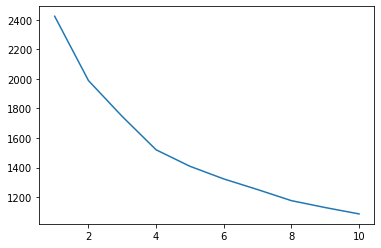

In [53]:
sse_clust=[]

for i in range (1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 0)
    kmeans.fit(patients_s)
    sse_clust.append(kmeans.inertia_)
    
    
plt.plot(range(1, 11), sse_clust)

# 4 clusters


In [54]:
kmeans = KMeans(n_clusters=4, init = 'k-means++', random_state = 0)
y_clust = kmeans.fit_predict(patients_s)
y_clust


array([3, 1, 1, 1, 2, 1, 2, 1, 3, 1, 1, 2, 1, 0, 3, 1, 2, 2, 1, 2, 1, 1,
       1, 3, 1, 2, 3, 1, 3, 3, 1, 0, 1, 1, 0, 1, 3, 1, 2, 2, 2, 1, 0, 2,
       1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 3, 1,
       0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 3, 0, 3, 0, 1, 1, 2, 3, 1, 2, 2, 3,
       1, 2, 3, 0, 1, 3, 1, 0, 2, 3, 1, 3, 1, 2, 2, 3, 1, 2, 3, 0, 1, 1,
       2, 3, 2, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2,
       1, 1, 1, 2, 3, 3, 0, 0, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 2, 0, 3, 3, 1, 1, 1, 0, 0,
       3, 2, 0, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 3,
       0, 1, 1, 0, 0, 3, 2, 0, 0, 2, 1, 0, 1, 0, 1, 2, 3, 3, 2, 3, 0, 3,
       2, 0, 3, 3, 0, 0, 0, 0, 2, 0, 1, 3, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2,
       0, 0, 0, 1, 2, 0, 2, 2, 0, 3, 3, 0, 2, 0, 0, 0, 2, 1, 3, 1, 0, 0,
       0, 0, 2, 1, 0, 3, 1, 1, 0, 1, 0, 1, 0, 1, 3, 0, 0, 3, 3, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 3, 2, 0, 0, 0, 3, 0, 1, 3,

### 3.3 What is the average of each variable in each cluster (the original, not the scaled variables)?

In [55]:
patients.drop(["outcome"],axis=1).groupby(y_clust).mean()

,age,gender,pain,blood_pressure,cholesterol,blood_sugar,heart_rate,exercise
0,56.987654,0.901235,0.222222,129.679012,245.456790,0.0,130.074074,0.864198
1,47.642857,0.785714,1.312500,124.633929,228.973214,0.0,164.187500,0.053571
2,60.861538,0.200000,1.138462,140.938462,275.923077,0.0,149.307692,0.107692
3,57.000000,0.733333,1.200000,139.066667,247.911111,1.0,149.177778,0.355556


### 3.4 Can you identify some variables that clearly have different average values for the clusters?

In [56]:
# yes 
# exercise  ... 
# actually, all variables have different average values, we can tell some information from it. 

# for example, for peopl in cluster 0, chest pain mostly likely caused by exercise, and intensity of the chest pain is the lowest,
# most gender is male,blood sugar is normal, heart rate is lower...




### 3.5 Perform k-means clustering now with k=2 (if your chosen value was 2 in the analysis already, you can continue with the previously created clusters). Compare the created two clusters to the ’outcome’ column. Do the created clusters separate patients who had heart attack from the other patients, or are the two clusters a mix of not healthy (have heart attack) and healthy (no heart attack) patients?

In [57]:
kmeans_2 = KMeans(n_clusters=2, init = 'k-means++', random_state = 0)
y_clust_2 = kmeans_2.fit_predict(patients_s)
y_clust_2


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,

In [58]:
# Compare the created two clusters to the ’outcome’ column.
pd.crosstab(patients.outcome, y_clust_2)

col_0,0,1
outcome,,
0,88,50
1,17,148


In [59]:
# created two clusters are a mix of not healthy (have heart attack) and healthy (no heart attack) patients